In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
with open(r'../../data/tidy/Shrewsbury_network_selco_added_length.csv') as Shrewsbury_length:
    df_Shrewsbury_length=pd.read_csv(Shrewsbury_length)

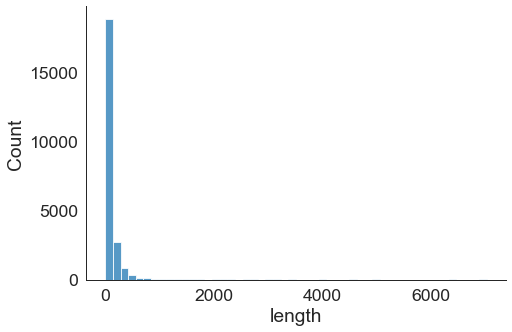

In [9]:
# plotting histogram for length
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_Shrewsbury_length, x="length", kind="hist", bins = 50, aspect = 1.5) 

,sumsquare_error,aic,bic,kl_div
burr,0.000004,3278.629547,-515675.884153,inf
lognorm,0.000007,3979.597752,-504022.831439,inf
beta,0.000008,7686.355773,-499911.641142,inf
norm,0.000028,61945.545942,-471828.376073,inf
gamma,0.000070,173322.522018,-450784.726552,inf


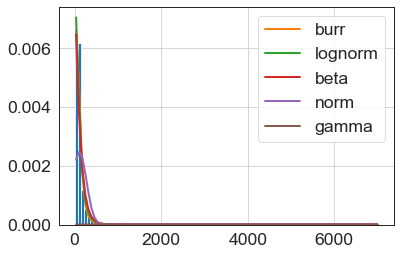

In [11]:
CLAY=df_Shrewsbury_length['length'].values
f = Fitter(CLAY,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [16]:
f.get_best(method ='sumsquare_error')

{'burr': {'c': 2.9211838804505934,
  'd': 0.37802429192622056,
  'loc': 0.009784986669438465,
  'scale': 141.1024895639385}}

In [13]:
f.fitted_param['burr']

(2.9211838804505934,
 0.37802429192622056,
 0.009784986669438465,
 141.1024895639385)

In [17]:
min(df_Shrewsbury_length['length'].values)

0.012561017765021

In [18]:
len(df_Shrewsbury_length['length'])

22988